In [2]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
import random 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from scipy.stats import pearsonr
%matplotlib inline 
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from graphviz import Source
from sklearn.tree import export_graphviz
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import decomposition
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of 
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from statsmodels.tools.tools import add_constant
from sklearn import metrics
from sklearn.inspection import permutation_importance
import multiprocessing
import re
from sklearn.metrics import f1_score,accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve

In [3]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv') #reading data set
data.sample(5,random_state = 12) #random 5 samples

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1997,60139,Female,32.0,0,0,Yes,Self-employed,Rural,128.72,26.3,smokes,0
512,27757,Male,31.0,0,0,Yes,Private,Urban,88.78,35.8,smokes,0
247,34060,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,NaN,Unknown,1
2485,53328,Female,14.0,0,0,No,Private,Rural,70.54,24.4,formerly smoked,0
2050,22689,Male,12.0,0,0,No,children,Rural,96.15,18.7,Unknown,0


In [4]:
data.shape #shape of the data

(5110, 12)

In [5]:
data.info() #column info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
data.drop(['id'], axis = 1, inplace = True) #dropping first column

In [7]:
data.isnull().sum().sort_values(ascending=False) #sum of all the null values per variable

bmi                  201
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
dtype: int64

In [8]:
data['bmi'] = data['bmi'].fillna(data['bmi'].mean()) #imputation with mean#

In [9]:
data.isnull().sum().sort_values(ascending=False) #sum of all the null values per variable

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
data.nunique() #unique values for each column

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

In [11]:
data.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [12]:
data.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [13]:
data.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [14]:
category = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
continous = ['age', 'bmi', 'avg_glucose_level'] #category and continous var list
print(f'There are a total of {len(category)} categorical variables and {len(continous)} continous variables') 
for i in category:
   data[i] = data[i].astype('category') #changing variables into categorical variables 

There are a total of 8 categorical variables and 3 continous variables


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5110 non-null   category
 1   age                5110 non-null   float64 
 2   hypertension       5110 non-null   category
 3   heart_disease      5110 non-null   category
 4   ever_married       5110 non-null   category
 5   work_type          5110 non-null   category
 6   Residence_type     5110 non-null   category
 7   avg_glucose_level  5110 non-null   float64 
 8   bmi                5110 non-null   float64 
 9   smoking_status     5110 non-null   category
 10  stroke             5110 non-null   category
dtypes: category(8), float64(3)
memory usage: 161.0 KB


In [16]:
data.describe().T #stats of numerical variables

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.893237,7.698018,10.30,23.800,28.400,32.80,97.60


In [17]:
data.describe(include = 'category').T #stats of categorical variables

,count,unique,top,freq
gender,5110,3,Female,2994
hypertension,5110,2,0,4612
heart_disease,5110,2,0,4834
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892
stroke,5110,2,0,4861


### EDA

In [18]:
def histogram_boxplot(feature):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    """   
    figure, (ax_box2, ax_hist2, ax_hist3) = plt.subplots(
        nrows = 1, ncols=3,# Number of rows of the subplot grid= 2
        figsize  = (20,5)) # creating the 2 subplots
    figure.tight_layout(pad = 7)
    sns.boxplot(x = feature,ax=ax_box2, color = '#4B8BBE', orient = 'v') # boxplot will be created 
    sns.distplot(feature, kde=True, ax=ax_hist2, color = '#a9a38f') # For histogram
    sns.distplot(feature, kde= True, ax=ax_hist3, hist = False) #Making an outline of the histogram 
    ax_hist2.axvline(np.mean(feature), color='r', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    ax_hist3.axvline(np.mean(feature), color = 'black', linestyle = '--') #Adding mean to second histogram
    ax_hist3.axvline(np.median(feature), color='black', linestyle='-') #Adding median to second histogram

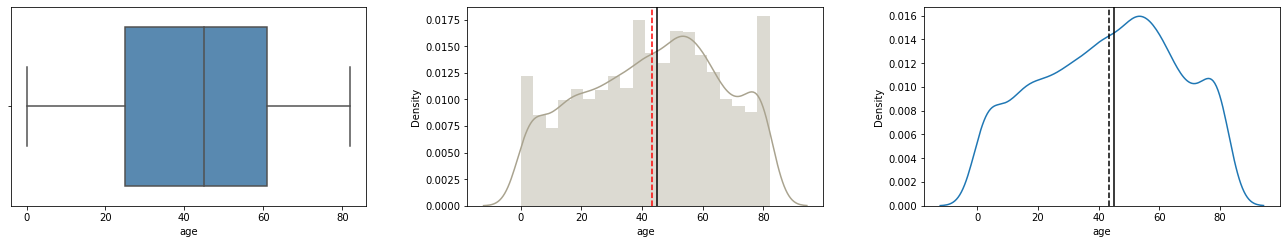

In [19]:
histogram_boxplot(data.age) #boxplot

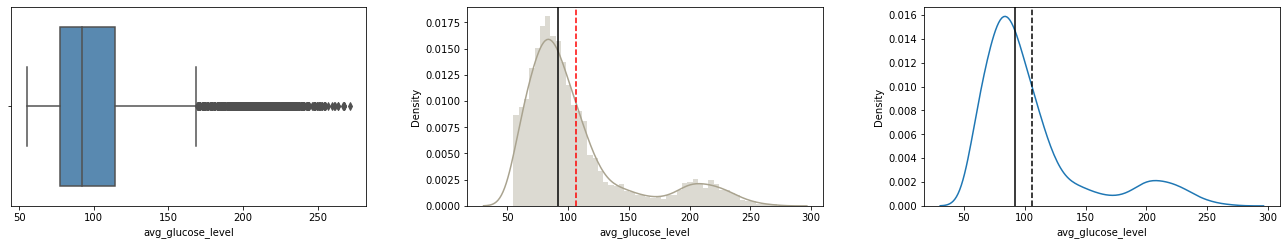

In [20]:
histogram_boxplot(data.avg_glucose_level)

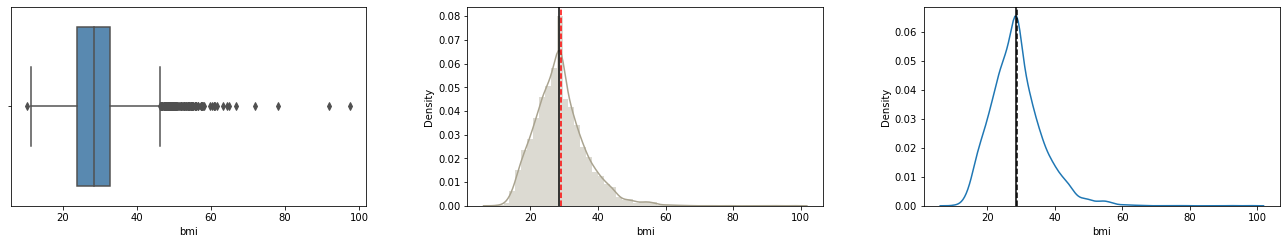

In [21]:
histogram_boxplot(data.bmi)

In [22]:
# Let's treat outliers by flooring and capping
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df


In [23]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()#converting numerical cols 
data = treat_outliers_all(data, numerical_col) #treating outliers

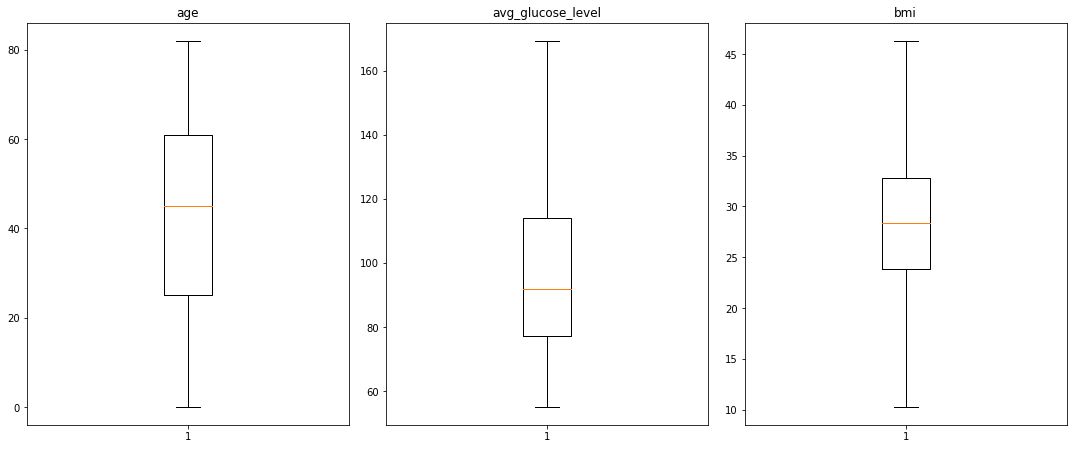

In [24]:
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col): #boxplots subplots 
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Categorical Variables

In [25]:
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

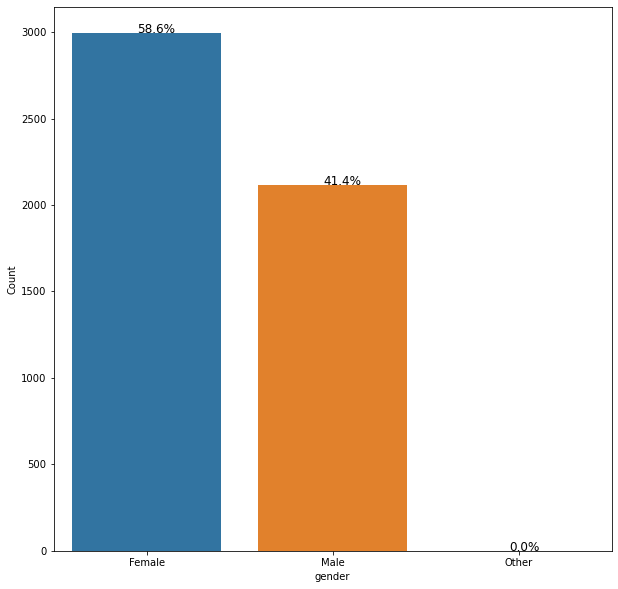

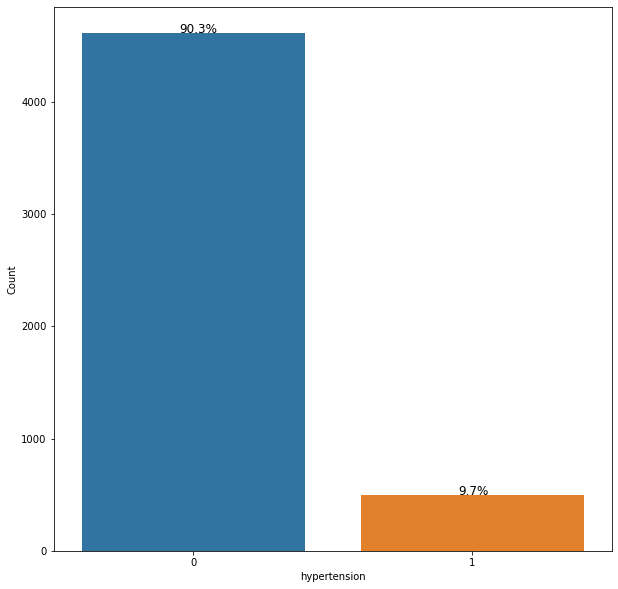

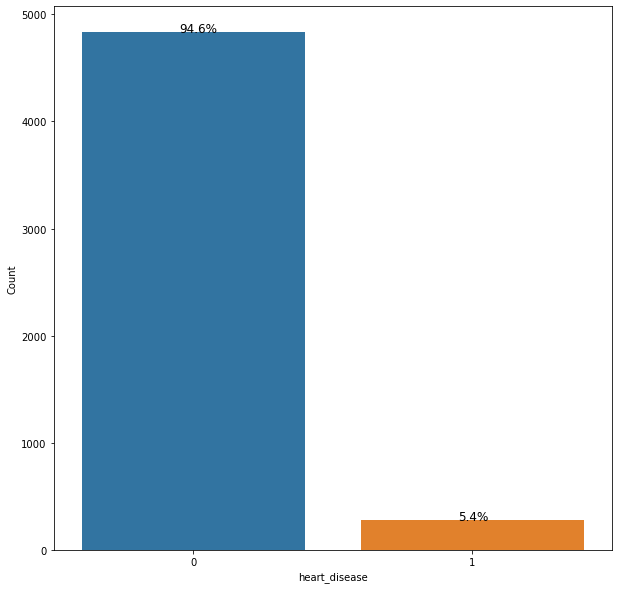

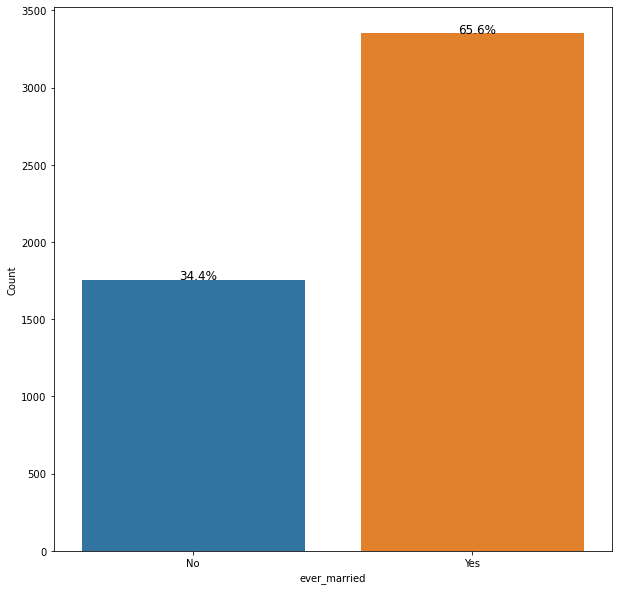

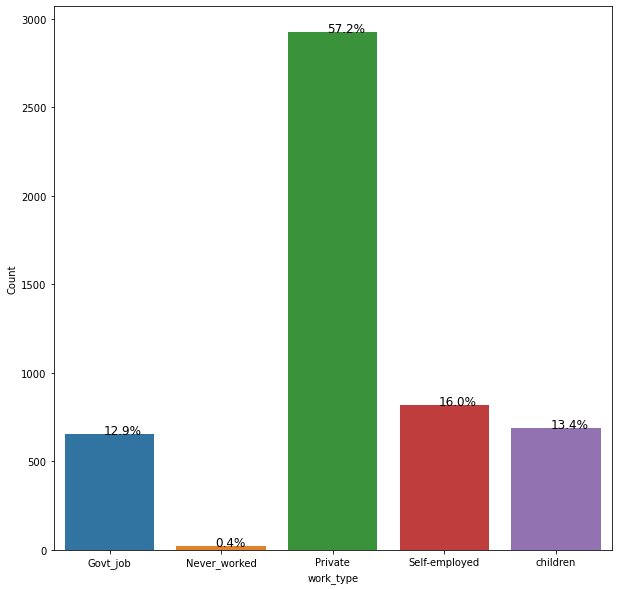

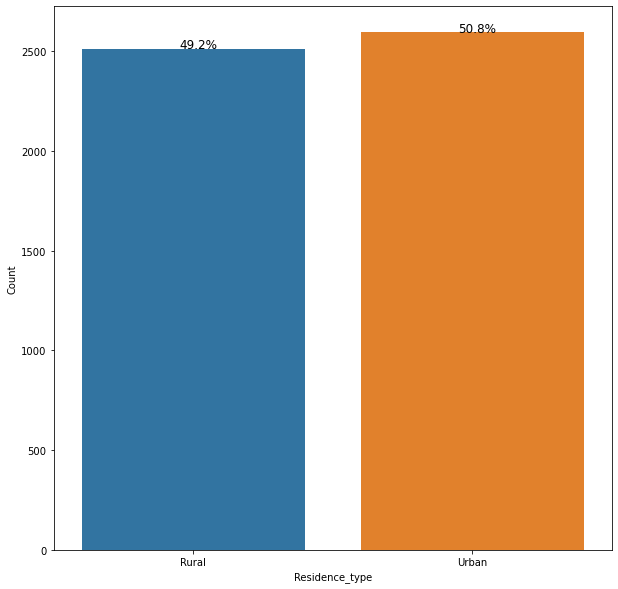

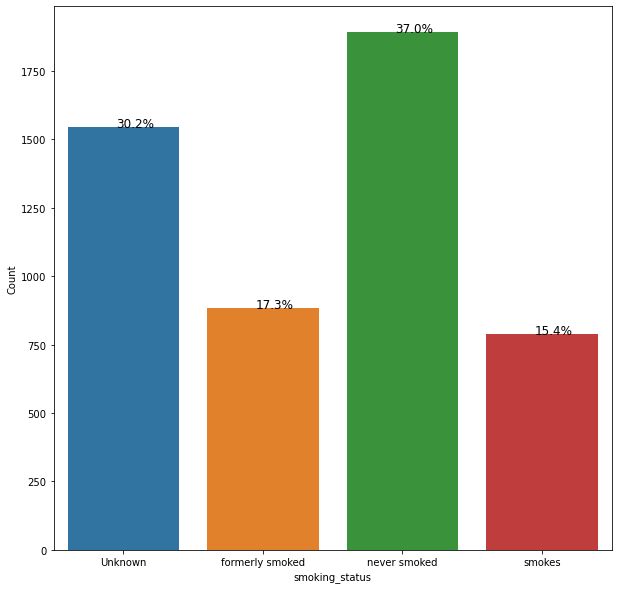

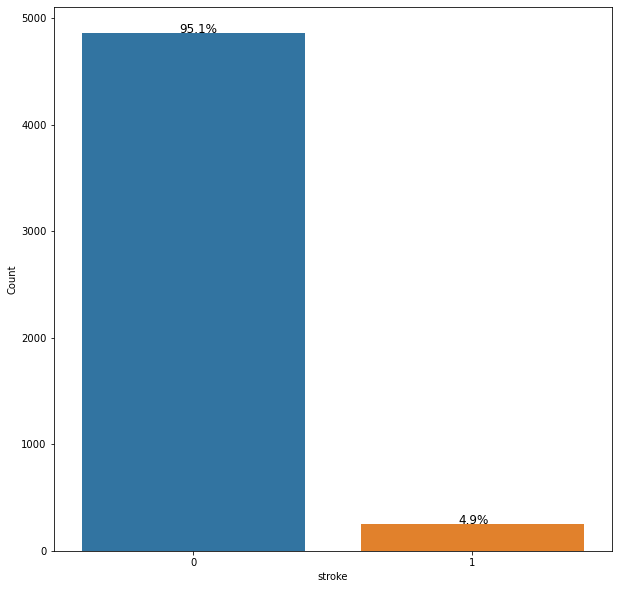

In [26]:
for i in category:    
    plt.figure(figsize=(10,10))
    ax = sns.countplot(data[i]) #count plot for Name
    plt.xlabel(i)
    plt.ylabel('Count')
    bar_perc(ax,data[i])

### Bivariate analysis

In [27]:
data.corr() #correlation

,age,avg_glucose_level,bmi
age,1.000000,0.199720,0.352852
avg_glucose_level,0.199720,1.000000,0.153273
bmi,0.352852,0.153273,1.000000


In [28]:
data.cov() #covariance

,age,avg_glucose_level,bmi
age,511.331792,150.003968,56.809404
avg_glucose_level,150.003968,1103.218807,36.246980
bmi,56.809404,36.246980,50.693552


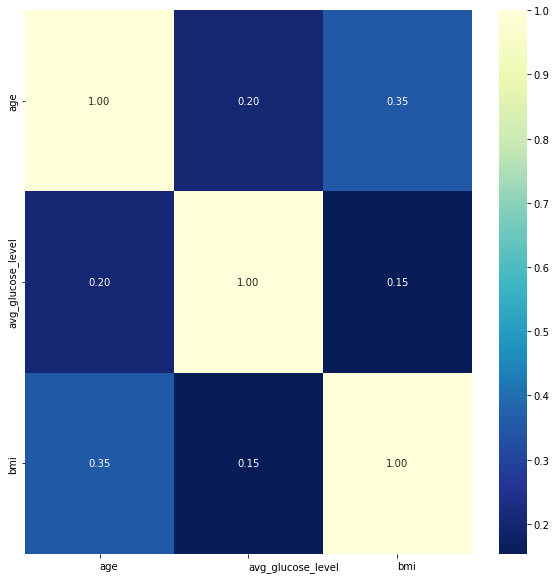

In [29]:
plt.figure(figsize=(10,10)) 
cmap = sns.cm.rocket_r
ax = sns.heatmap(data.corr(), annot=True,
            fmt='0.2f', cmap = "YlGnBu_r" )
ax.set_xticklabels(
    ax.get_xticklabels(),
    horizontalalignment='left'
)# heatmap
plt.show()

<Figure size 1440x1440 with 0 Axes>

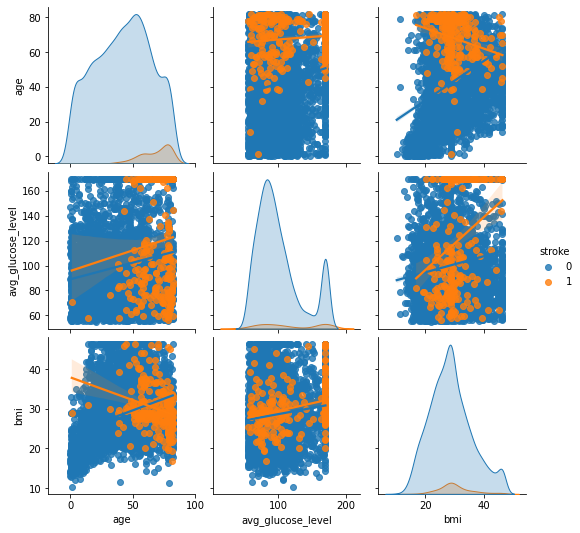

In [30]:
plt.figure(figsize = (20,20))
sns.pairplot(data = data, kind = 'reg', hue = 'stroke') #pairplot
plt.show()

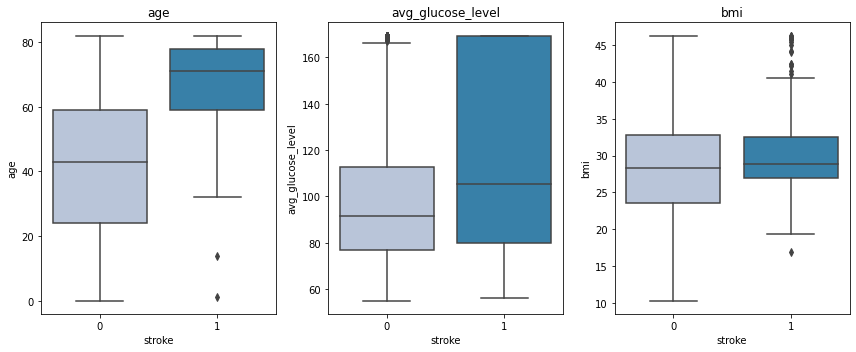

In [31]:
cols = data[['age', 'avg_glucose_level', 'bmi']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols): #boxplot of numerical variables into dependent variable. 
                     plt.subplot(1,3,i+1)
                     sns.boxplot(data['stroke'],data[variable],palette="PuBu")
                    
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

In [32]:
for i in category:
    print(data[i].value_counts()) #printing the unique values of categorical variables
    print('-'*50)

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
--------------------------------------------------
0    4612
1     498
Name: hypertension, dtype: int64
--------------------------------------------------
0    4834
1     276
Name: heart_disease, dtype: int64
--------------------------------------------------
Yes    3353
No     1757
Name: ever_married, dtype: int64
--------------------------------------------------
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
--------------------------------------------------
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
--------------------------------------------------
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
--------------------------------------------------
0    4861
1     249
Name: stroke, dtype: int64
--------------------------

In [33]:
df = data.copy()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5110 non-null   category
 1   age                5110 non-null   float64 
 2   hypertension       5110 non-null   category
 3   heart_disease      5110 non-null   category
 4   ever_married       5110 non-null   category
 5   work_type          5110 non-null   category
 6   Residence_type     5110 non-null   category
 7   avg_glucose_level  5110 non-null   float64 
 8   bmi                5110 non-null   float64 
 9   smoking_status     5110 non-null   category
 10  stroke             5110 non-null   category
dtypes: category(8), float64(3)
memory usage: 161.0 KB


In [35]:
for i in category:
    print(df[i].value_counts()) #printing the unique values of categorical variables
    print('-'*50)

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
--------------------------------------------------
0    4612
1     498
Name: hypertension, dtype: int64
--------------------------------------------------
0    4834
1     276
Name: heart_disease, dtype: int64
--------------------------------------------------
Yes    3353
No     1757
Name: ever_married, dtype: int64
--------------------------------------------------
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
--------------------------------------------------
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
--------------------------------------------------
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
--------------------------------------------------
0    4861
1     249
Name: stroke, dtype: int64
--------------------------

In [36]:
replaceStruct = {
                "gender": {"Female": 0, "Male": 1 ,"Other": 2},
                "ever_married": {"Yes": 1, "No":0},
                 "work_type": {"Never_worked": 0, "Children":1, 'Self-employed':2, 'Private':3, "Govt_job":4},
                 "Residence_type": {"Urban":0, "Rural":1},
                "smoking_status": {"never smoked":0, "Unknown":1, "formerly smoked":2, "smokes":3},
                    }
oneHotCols=["gender", "ever_married", "work_type", "Residence_type", "smoking_status", "hypertension", "heart_disease"]

In [37]:
#df = df.replace(replaceStruct)#replacing all the string columns with the integer associates
df = pd.get_dummies(df, columns=oneHotCols,drop_first=True) #one code encoding

In [38]:
df.head()

,age,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension_1,heart_disease_1
0,67.0,169.3575,36.600000,1,1,0,1,0,1,0,0,1,1,0,0,0,1
1,61.0,169.3575,28.893237,1,0,0,1,0,0,1,0,0,0,1,0,0,0
2,80.0,105.9200,32.500000,1,1,0,1,0,1,0,0,0,0,1,0,0,1
3,49.0,169.3575,34.400000,1,0,0,1,0,1,0,0,1,0,0,1,0,0
4,79.0,169.3575,24.000000,1,0,0,1,0,0,1,0,0,0,1,0,1,0


In [39]:
df['age'] = df['age']/df['age'].max()
df['avg_glucose_level'] = df['avg_glucose_level']/df['avg_glucose_level'].max()
df['bmi'] = df['bmi']/df['bmi'].max()

In [40]:
df.head()

,age,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension_1,heart_disease_1
0,0.817073,1.000000,0.790497,1,1,0,1,0,1,0,0,1,1,0,0,0,1
1,0.743902,1.000000,0.624044,1,0,0,1,0,0,1,0,0,0,1,0,0,0
2,0.975610,0.625423,0.701944,1,1,0,1,0,1,0,0,0,0,1,0,0,1
3,0.597561,1.000000,0.742981,1,0,0,1,0,1,0,0,1,0,0,1,0,0
4,0.963415,1.000000,0.518359,1,0,0,1,0,0,1,0,0,0,1,0,1,0


### Split the data

In [41]:
X = df.drop("stroke" , axis=1)
y = df.pop("stroke")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y) #train test split

In [42]:
category.remove('stroke') #removing stroke from category

In [43]:
X_train.info()
feature_names = X_train.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 2882 to 4232
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             3577 non-null   float64
 1   avg_glucose_level               3577 non-null   float64
 2   bmi                             3577 non-null   float64
 3   gender_Male                     3577 non-null   uint8  
 4   gender_Other                    3577 non-null   uint8  
 5   ever_married_Yes                3577 non-null   uint8  
 6   work_type_Never_worked          3577 non-null   uint8  
 7   work_type_Private               3577 non-null   uint8  
 8   work_type_Self-employed         3577 non-null   uint8  
 9   work_type_children              3577 non-null   uint8  
 10  Residence_type_Urban            3577 non-null   uint8  
 11  smoking_status_formerly smoked  3577 non-null   uint8  
 12  smoking_status_never smoked    

In [44]:
def make_confusion_matrix(model,library,test_X,y_actual,threshold=0.5,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    library: Takes two arguments stats for statsmodels and sklearn for sklearn library 
    test_X: test set
    y_actual : ground truth  
    threshold: thresold for classifiying the observation as 1
    
    '''
    
    if library == 'sklearn':
        y_predict = model.predict(test_X)
        cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    
        df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
        group_counts = ["{0:0.0f}".format(value) for value in
                    cm.flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in
                             cm.flatten()/np.sum(cm)]
        labels = [f"{v1}\n{v2}" for v1, v2 in
                  zip(group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)
        plt.figure(figsize = (10,7))
        sns.heatmap(df_cm, annot=labels,fmt='')
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
    
    elif library =='stats':
        y_predict = model.predict(test_X)>threshold
        cm=metrics.confusion_matrix( y_actual, y_predict, labels=[1,0])
        cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    
        df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
        group_counts = ["{0:0.0f}".format(value) for value in
                    cm.flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in
                             cm.flatten()/np.sum(cm)]
        labels = [f"{v1}\n{v2}" for v1, v2 in
                  zip(group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)
        plt.figure(figsize = (10,7))
        sns.heatmap(df_cm, annot=labels,fmt='')
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

In [45]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_auc_roc = metrics.roc_auc_score(y_train, pred_train)
    test_auc_roc = metrics.roc_auc_score(y_test, pred_test)

    score_list.extend((train_acc,test_acc,train_recall,test_recall, train_auc_roc, test_auc_roc))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("ROC_AUC on training set : ",metrics.roc_auc_score(y_train,pred_train))
        print("ROC_AUC on test set : ",metrics.roc_auc_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores|

In [46]:
def get_metrics_score2(model,library,train,test,train_y,test_y,threshold=0.5,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    library: Takes two arguments stats for statsmodels and sklearn for sklearn library 
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    if library=='stats':
        score_list=[] 
    
        pred_train = (model.predict(train)>threshold)
        pred_test = (model.predict(test)>threshold)

        pred_train = np.round(pred_train)
        pred_test = np.round(pred_test)
    
        train_acc = accuracy_score(pred_train,train_y)
        test_acc = accuracy_score(pred_test,test_y)
    
        train_recall = recall_score(train_y,pred_train)
        test_recall = recall_score(test_y,pred_test)
    
        train_precision = precision_score(train_y,pred_train)
        test_precision = precision_score(test_y,pred_test)
    

        score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    elif library=='sklearn':
        score_list=[] 
    
        pred_train = model.predict(train)
        pred_test = model.predict(test)
    
        train_acc = accuracy_score(pred_train,train_y)
        test_acc = accuracy_score(pred_test,test_y)

        train_recall = recall_score(train_y,pred_train)
        test_recall = recall_score(test_y,pred_test)

        train_precision = precision_score(train_y,pred_train)
        test_precision = precision_score(test_y,pred_test)

        score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))

    
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
   
    if roc == True and library=='sklearn':
        pred_train_prob = model.predict_proba(train)[:,1]
        pred_test_prob  = model.predict_proba(test)[:,1]
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train_prob))
        print("ROC-AUC Score on test set : ",roc_auc_score(test_y,pred_test_prob))
        
    elif roc == True and library=='stats':
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on test set : ",roc_auc_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

### Tuning Knn Classifier

In [47]:
# Choose the type of classifier. 
estimator = KNeighborsClassifier()

# Grid of parameters to choose from
parameters = {
              'n_neighbors': [2, 3, 4, 5],
              'metric': ["euclidean", "manhattan", "minkowski"]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.roc_auc_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer,cv=6, n_jobs=multiprocessing.cpu_count())
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [48]:
final_model_knn = KNeighborsClassifier(metric='manhattan', n_neighbors=3)
final_model_knn.fit(X_train, y_train)
get_metrics_score(final_model_knn)

Accuracy on training set :  0.9555493430248811
Accuracy on test set :  0.9432485322896281
Recall on training set :  0.16091954022988506
Recall on test set :  0.10666666666666667
ROC_AUC on training set :  0.5785496907731852
ROC_AUC on test set :  0.5464746227709191


[0.9555493430248811,
 0.9432485322896281,
 0.16091954022988506,
 0.10666666666666667,
 0.5785496907731852,
 0.5464746227709191]

### Decision Tree Classifier

In [61]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
            'max_depth': [3,4,8,10],
            'min_samples_leaf': [1,2,4, 6, 7, 8, 10],
            'criterion': ['entropy','gini'],
            'splitter': ['best','random'],
            'min_impurity_decrease': [0.000001,0.00001,0.0001],
            'max_features': ['log2','sqrt']
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.roc_auc_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer,cv=4,n_jobs=multiprocessing.cpu_count())
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_features='log2',
                       min_impurity_decrease=1e-05, min_samples_leaf=4,
                       random_state=1)

In [49]:
final_model_dtc = DecisionTreeClassifier(max_depth=8, max_features='log2',
                       min_impurity_decrease=1e-05, min_samples_leaf=4,
                       random_state=1)
final_model_dtc.fit(X_train, y_train)
get_metrics_score(final_model_dtc)

Accuracy on training set :  0.9535923958624546
Accuracy on test set :  0.9419439008480104
Recall on training set :  0.09195402298850575
Recall on test set :  0.013333333333333334
ROC_AUC on training set :  0.5448015780531714
ROC_AUC on test set :  0.5015226337448561


[0.9535923958624546,
 0.9419439008480104,
 0.09195402298850575,
 0.013333333333333334,
 0.5448015780531714,
 0.5015226337448561]

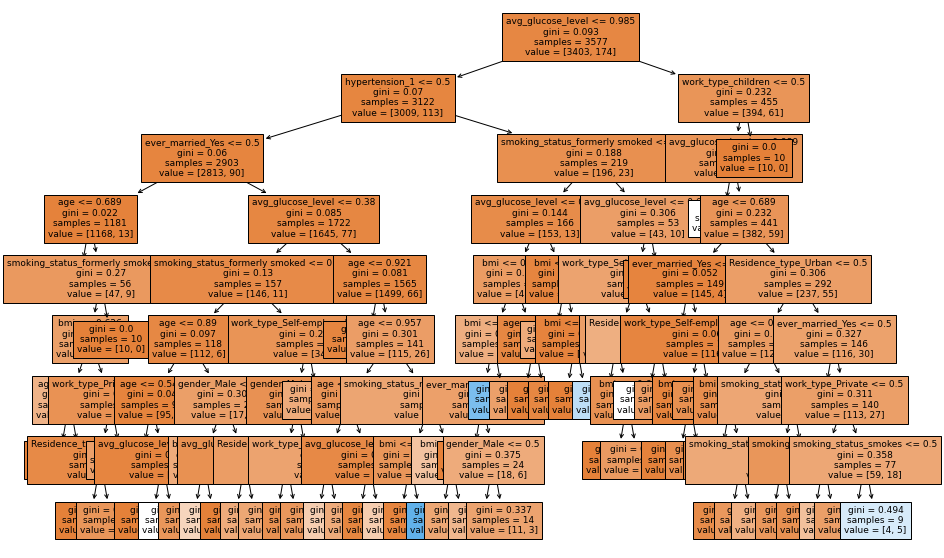

In [50]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(final_model_dtc,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

### Navies Bayes

In [51]:
estimator = GaussianNB()

parameters = {
            'var_smoothing': np.logspace(0,-9, num=100)
             }
scorer = metrics.make_scorer(metrics.roc_auc_score)

grid_obj = GridSearchCV(estimator, parameters, scoring=scorer,cv=6, n_jobs=multiprocessing.cpu_count())
grid_obj = grid_obj.fit(X_train, y_train)

estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

GaussianNB(var_smoothing=0.0004328761281083057)

In [51]:
final_model_gn = GaussianNB(var_smoothing=0.0004328761281083057)
final_model_gn.fit(X_train,y_train)
get_metrics_score(final_model_gn)

Accuracy on training set :  0.6634050880626223
Accuracy on test set :  0.6555772994129159
Recall on training set :  0.8160919540229885
Recall on test set :  0.8133333333333334
ROC_AUC on training set :  0.7358449778930694
ROC_AUC on test set :  0.7303978052126201


[0.6634050880626223,
 0.6555772994129159,
 0.8160919540229885,
 0.8133333333333334,
 0.7358449778930694,
 0.7303978052126201]

### SVM

In [65]:
# Choose the type of classifier. 
estimator = SVC()

# Grid of parameters to choose from
parameters = {
              'C': [0.01, 0.05, 0.1],
              'degree': [1, 2, 3],
              'gamma': [1, 3, 5],
              'kernel': ["linear","poly","rbf"],
              'probability': [True]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.roc_auc_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer,cv=4, n_jobs=multiprocessing.cpu_count())
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

SVC(C=0.05, gamma=5, kernel='poly', probability=True)

In [52]:
final_model_svc = SVC(C=0.05, gamma=5, kernel='poly', probability=True)
final_model_svc.fit(X_train, y_train)
get_metrics_score(final_model_svc)

Accuracy on training set :  0.9586245457086945
Accuracy on test set :  0.9393346379647749
Recall on training set :  0.1724137931034483
Recall on test set :  0.06666666666666667
ROC_AUC on training set :  0.5856191798311835
ROC_AUC on test set :  0.525445816186557


[0.9586245457086945,
 0.9393346379647749,
 0.1724137931034483,
 0.06666666666666667,
 0.5856191798311835,
 0.525445816186557]

### Tuned Random Forests

In [70]:
estimator = RandomForestClassifier()

parameters = {
            'bootstrap': [True],
            'max_depth': [2, 3, 4, 5, 6],
            'max_features': [2, 3, 4, 5, 6],
            'min_samples_leaf': [3, 4, 5],
            'min_samples_split': [8, 10, 12],
            'n_estimators': [100, 200, 300, 500, 1000]
}
scorer = metrics.make_scorer(metrics.roc_auc_score)

grid_obj = GridSearchCV(estimator, parameters, scoring=scorer,cv=5, n_jobs=multiprocessing.cpu_count())
grid_obj = grid_obj.fit(X_train, y_train)

estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, max_features=2, min_samples_leaf=3,
                       min_samples_split=8)

In [53]:
final_model_rfc = RandomForestClassifier(max_depth=2, max_features=2, min_samples_leaf=3,
                       min_samples_split=8)
final_model_rfc.fit(X_train, y_train)
get_metrics_score(final_model_rfc)

Accuracy on training set :  0.9513558848196813
Accuracy on test set :  0.9510763209393346
Recall on training set :  0.0
Recall on test set :  0.0
ROC_AUC on training set :  0.5
ROC_AUC on test set :  0.5


[0.9513558848196813, 0.9510763209393346, 0.0, 0.0, 0.5, 0.5]

In [54]:
models = [final_model_knn, final_model_dtc,final_model_rfc, final_model_gn, final_model_svc]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
roc_auc_train = []
roc_auc_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    roc_auc_train.append(j[4])
    roc_auc_test.append(j[5])

In [55]:
comparison_frame = pd.DataFrame({'Model':['KNN Algorithm','Decision Tree','Random Forest','Gaussian NB','SVM'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_ROC_AUC_Score':roc_auc_train,'Test_ROC_AUC_Score':roc_auc_test}) #creating a comparision table for models

In [56]:
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_ROC_AUC_Score,Test_ROC_AUC_Score
0,KNN Algorithm,0.955549,0.943249,0.160920,0.106667,0.578550,0.546475
1,Decision Tree,0.953592,0.941944,0.091954,0.013333,0.544802,0.501523
2,Random Forest,0.951356,0.951076,0.000000,0.000000,0.500000,0.500000
3,Gaussian NB,0.663405,0.655577,0.816092,0.813333,0.735845,0.730398
4,SVM,0.958625,0.939335,0.172414,0.066667,0.585619,0.525446


In [65]:
imps = permutation_importance(final_model_gn, X_test, y_test)
importances = imps.importances_mean
features = X_train.columns
std = imps.importances_std
indices = np.argsort(importances)[::-1]
print(features[indices])

Index(['heart_disease_1', 'hypertension_1', 'avg_glucose_level', 'gender_Male',
       'smoking_status_never smoked', 'smoking_status_smokes',
       'work_type_Private', 'gender_Other', 'Residence_type_Urban',
       'work_type_Never_worked', 'work_type_Self-employed', 'bmi',
       'smoking_status_formerly smoked', 'work_type_children', 'age',
       'ever_married_Yes'],
      dtype='object')
